In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
WINDOW_SIZE = 5

def get_lats(df, ws=WINDOW_SIZE):
    max_t = df["finish_ts"].max()
    ts = [t for t in range(int(max_t)+2)]
    lats = []
    for t in ts:
        d = df[(t-ws < df["finish_ts"]) & (df["finish_ts"] <= t)]
        lat = (d["finish_ts"]-d["issue_ts"]).mean()
        lats.append(lat)
    return ts, lats


def get_hrs(df, ws=WINDOW_SIZE):
    max_t = df["finish_ts"].max()
    ts = [t for t in range(int(max_t)+2)]
    hrs = []
    for t in ts:
        d = df[(t-ws < df["finish_ts"]) & (df["finish_ts"] <= t)]
        h = len(d[d["hit"] == True])/ws
        hrs.append(h)
    return ts, hrs

In [37]:
TENANT_NUM = 3
DURATION = 900

ams_df = pd.read_csv(
    f"/home/yunchi/582/resalloc/results/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter0_AMShare.csv"
)
glob_df = pd.read_csv(
    f"/home/yunchi/582/resalloc/results/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter0_GlobalLRU.csv"
)
maxmin_df = pd.read_csv(
    f"/home/yunchi/582/resalloc/results/selected_data_tenant{TENANT_NUM}_time0-{DURATION}_iter0_Max-Min.csv"
)

In [50]:
tntids = set(ams_df["tntid"])
print(tntids)

{4192, 3507, 4548}


In [48]:
tntid = 4192
base_df = maxmin_df
comp = get_hrs
# comp = get_lats

ams_ts, ams_lats = comp(ams_df[ams_df["tntid"] == tntid], WINDOW_SIZE)
base_ts, base_lats = comp(base_df[base_df["tntid"] == tntid], WINDOW_SIZE)
len_t = min(len(ams_ts), len(base_ts))

0.0


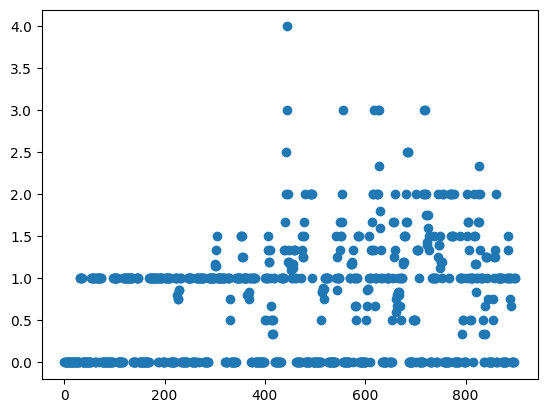

In [45]:

lats_ratio = []
print(ams_lats[0])
for al, bl in zip(ams_lats[:len_t], base_lats[:len_t]):
    if bl:
        lats_ratio.append(al/bl)
    else:
        lats_ratio.append(0)
plt.scatter(list(range(len_t)), lats_ratio)
# plt.ylim(0, 2)

In [52]:
for t in tntids:
    ams_tdf = ams_df[ams_df["tntid"] == t]
    base_tdf = base_df[base_df["tntid"] == t]
    
    avg_lat_ams = (ams_tdf["finish_ts"]-ams_tdf["issue_ts"]).mean()
    avg_lat_base = (base_tdf["finish_ts"]-base_tdf["issue_ts"]).mean()
    print("lat_ratio:", avg_lat_ams/avg_lat_base)
    
    hit_ams = len(ams_tdf[ams_tdf["hit"] == True])
    hit_base = len(base_tdf[ams_tdf["hit"] == True])
    print("hitrate_ratio:", hit_ams/hit_base)

lat_ratio: 0.9611297770275046
lat_ratio: 0.9437629876386441
lat_ratio: 0.9499238475058316
